In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Read the significant earthquake data for Turkey between 90 and 22
data = pd.read_csv("./resources/90_22_turkey.csv")

print(data.head(10))


                       time  latitude  longitude  depth  mag magType  nst  \
0  1990-12-06T08:04:32.180Z    39.247     29.123    5.0  3.0      md  NaN   
1  1990-12-08T04:12:47.380Z    37.001     27.475   10.0  3.8      md  NaN   
2  1990-12-08T20:23:24.700Z    39.250     28.162   10.0  3.2      md  NaN   
3  1990-12-09T01:16:37.230Z    36.219     33.919   31.3  3.8      ml  NaN   
4  1990-12-09T10:23:58.290Z    40.764     27.558   10.0  2.5      md  NaN   
5  1990-12-09T11:04:35.740Z    39.655     27.576   10.0  3.8      md  NaN   
6  1990-12-09T11:23:55.190Z    39.214     27.981   10.0  2.7      md  NaN   
7  1990-12-09T13:29:25.560Z    39.382     26.267   10.0  3.1      md  NaN   
8  1990-12-09T19:18:45.930Z    38.221     28.983   10.0  2.7      md  NaN   
9  1990-12-10T01:06:40.710Z    37.516     29.550   10.0  2.9      md  NaN   

   gap  dmin  rms  ...                   updated  \
0  NaN   NaN  1.3  ...  2014-11-07T00:47:34.600Z   
1  NaN   NaN  0.8  ...  2014-11-07T00:47:35.242Z

In [3]:
print(data.columns)

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')


In [4]:
print(data.describe())


           latitude     longitude         depth           mag          nst  \
count  17780.000000  17780.000000  17780.000000  17780.000000  5931.000000   
mean      38.861237     29.445242     14.208791      3.290371    27.704266   
std        1.390410      3.998897     16.593737      0.626084    57.269425   
min       35.807000     25.665000      0.000000      2.500000     4.000000   
25%       38.029000     27.403000     10.000000      2.800000     5.000000   
50%       39.111000     28.073500     10.000000      3.100000     9.000000   
75%       39.703000     29.507250     10.000000      3.700000    22.000000   
max       42.378900     45.219000    200.000000      7.600000   706.000000   

               gap        dmin           rms  horizontalError   depthError  \
count  5811.000000  850.000000  10491.000000       930.000000  1638.000000   
mean    121.424299    0.972376      0.731168         4.526828     5.061727   
std      63.687042    0.440704      0.361525         1.160842  

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17780 entries, 0 to 17779
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             17780 non-null  object 
 1   latitude         17780 non-null  float64
 2   longitude        17780 non-null  float64
 3   depth            17780 non-null  float64
 4   mag              17780 non-null  float64
 5   magType          17780 non-null  object 
 6   nst              5931 non-null   float64
 7   gap              5811 non-null   float64
 8   dmin             850 non-null    float64
 9   rms              10491 non-null  float64
 10  net              17780 non-null  object 
 11  id               17780 non-null  object 
 12  updated          17780 non-null  object 
 13  place            17780 non-null  object 
 14  type             17780 non-null  object 
 15  horizontalError  930 non-null    float64
 16  depthError       1638 non-null   float64
 17  magError    

In [6]:
# Convert the time column to datetime, first 10 characters are date, last 8 characters are time
data["time"] = pd.to_datetime(data["time"].str[:10])

print(data["time"].head(10))


0   1990-12-06
1   1990-12-08
2   1990-12-08
3   1990-12-09
4   1990-12-09
5   1990-12-09
6   1990-12-09
7   1990-12-09
8   1990-12-09
9   1990-12-10
Name: time, dtype: datetime64[ns]


Text(0.5, 1.0, '2012-2022')

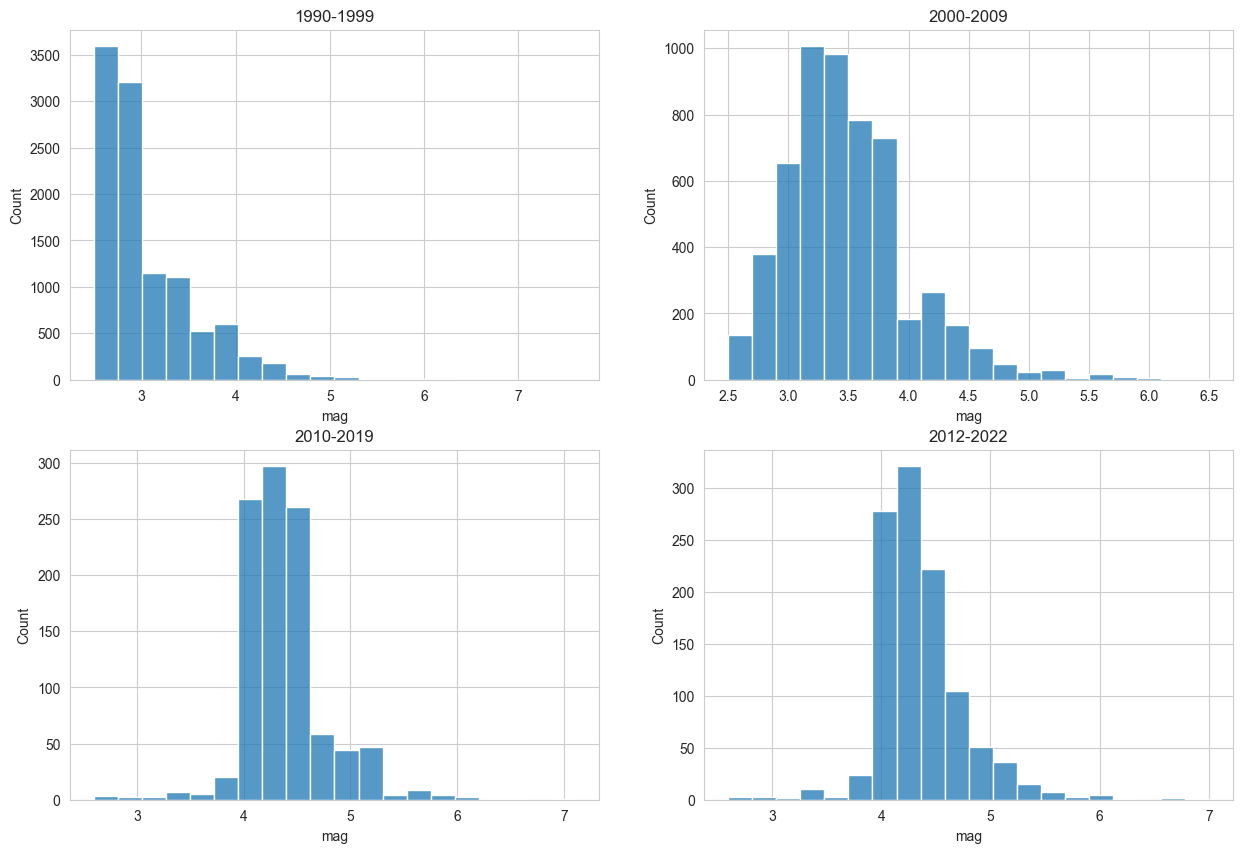

In [7]:
# Plot the magnitude counts for periods of 10 years, 1990-1999, 2000-2009, 2010-2019, 2012-2022
# There should be 4 different subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
first_period = data[(data["time"] >= "1990-01-01") & (data["time"] < "2000-01-01")]
second_period = data[(data["time"] >= "2000-01-01") & (data["time"] < "2010-01-01")]
third_period = data[(data["time"] >= "2010-01-01") & (data["time"] < "2020-01-01")]
fourth_period = data[(data["time"] >= "2012-01-01") & (data["time"] < "2022-01-01")]

sns.histplot(data=first_period, x="mag", bins=20, ax=axs[0, 0])
axs[0, 0].set_title("1990-1999")
sns.histplot(data=second_period, x="mag", bins=20, ax=axs[0, 1])
axs[0, 1].set_title("2000-2009")
sns.histplot(data=third_period, x="mag", bins=20, ax=axs[1, 0])
axs[1, 0].set_title("2010-2019")
sns.histplot(data=fourth_period, x="mag", bins=20, ax=axs[1, 1])
axs[1, 1].set_title("2012-2022")


We can easily observe the asymmetry in the distribution of the magnitudes. The smaller magnitudes are probably stopped being reported after some year between 2000-2010.


In [8]:
# Check the number of the earthquakes between 1990-1999
print("Total number of earthquakes in the dataset: ", data.shape[0])
print("Number of earthquakes between 1990-1999: ", first_period.shape[0])


Total number of earthquakes in the dataset:  17780
Number of earthquakes between 1990-1999:  10772


More than half of our data belongs to the period between 1990-1999.

We may want to discard the earthquakes with a magnitude less than 3.0, as they cause imbalance in the data.

Also, we can try to find after which year does this imbalance start.


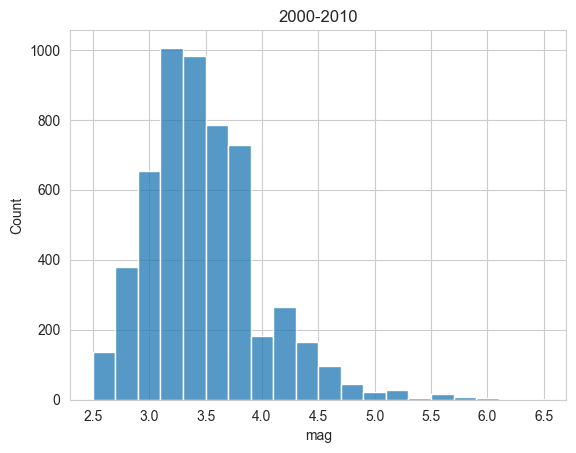

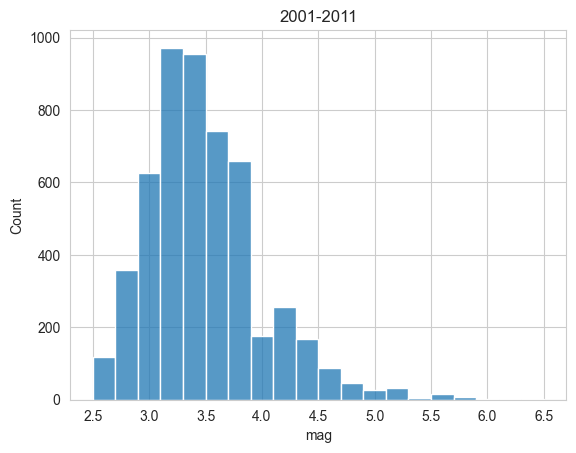

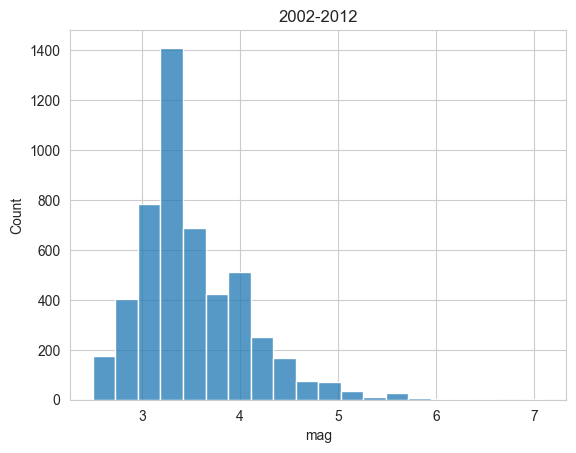

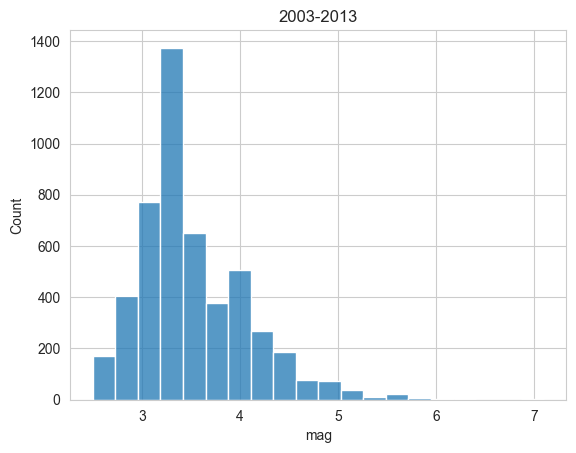

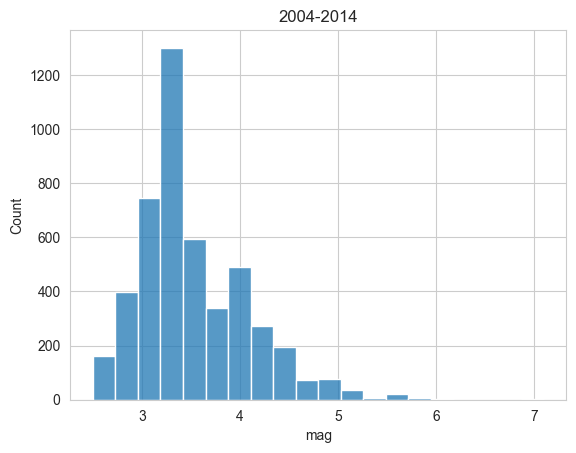

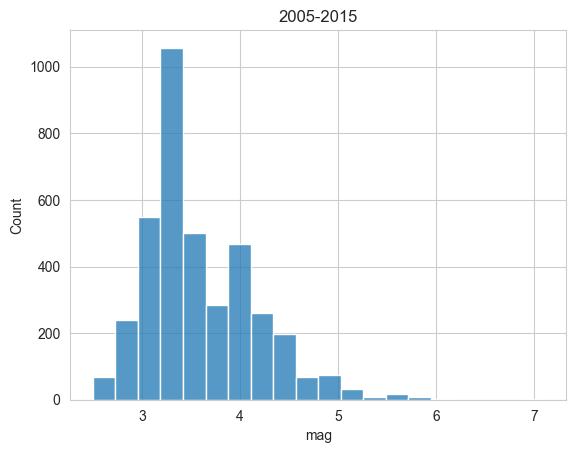

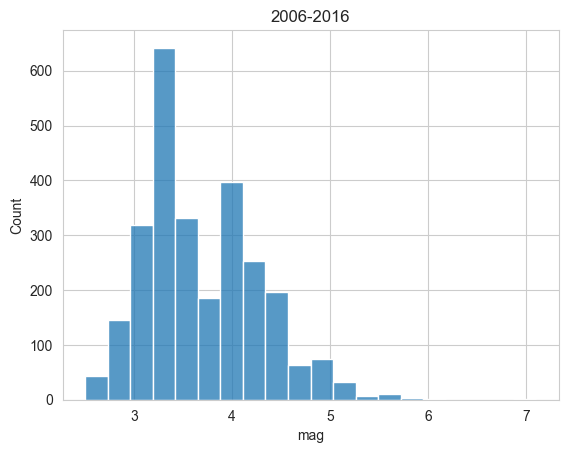

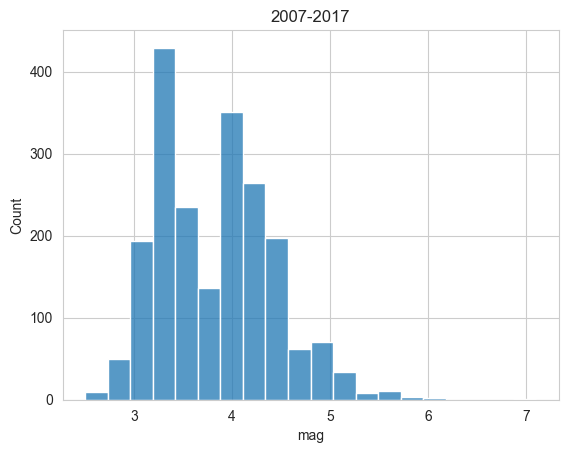

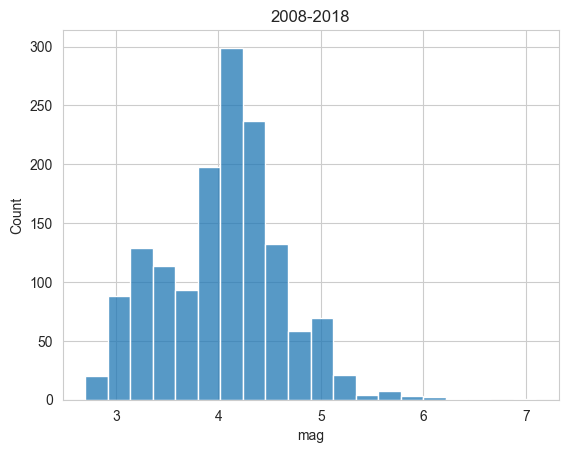

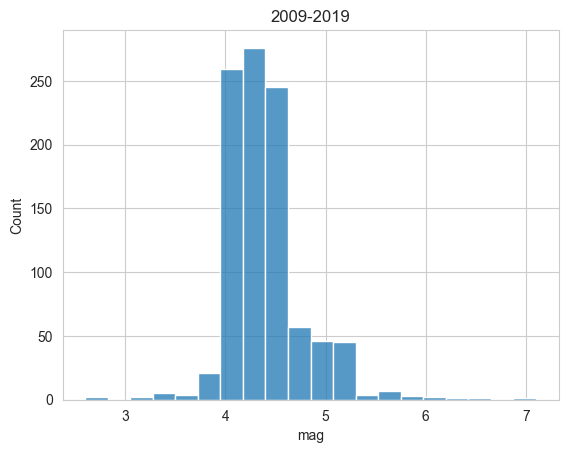

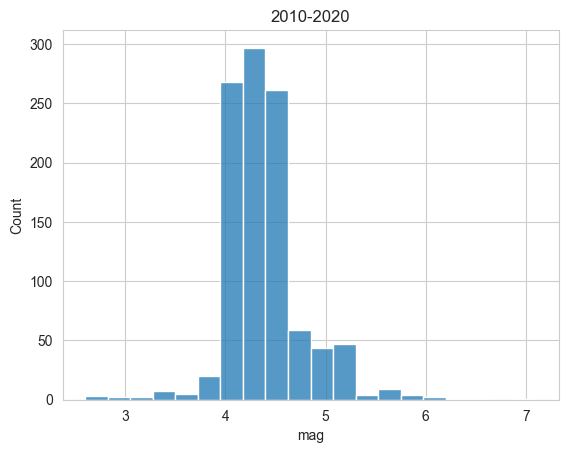

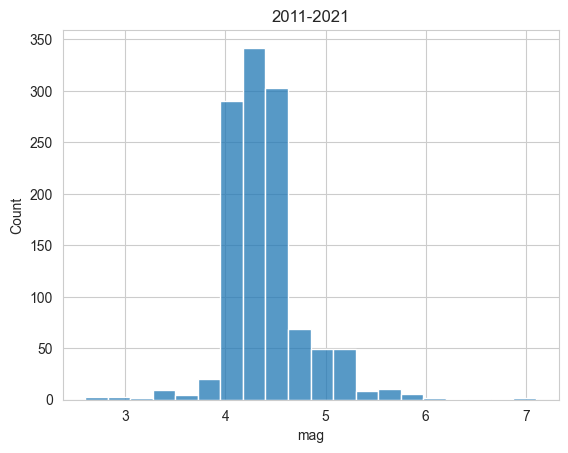

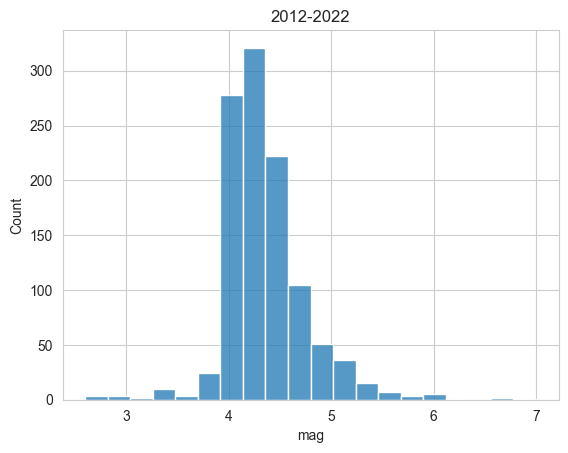

In [9]:
# Check the distributions of the magnitudes for each 10 years periods between 2000-2022
str_timed_data = data.copy()
str_timed_data["time"] = str_timed_data["time"].astype(str)
for i in range(13):
    period = str_timed_data[(str_timed_data["time"] >= f"{2000 + i}-01-01") & (str_timed_data["time"] < f"{2000 + i + 10}-01-01")]
    sns.histplot(data=period, x="mag", bins=20)
    plt.title(f"{2000 + i}-{2000 + i + 10}")
    plt.show()

We can see that the reports for the lower magnitude earthquakes are considerably less as the years progress.

This is probably because the technology and the network of the seismometers have improved over the years and many more lower order earthquakes are being detected and they decided to not share them anymore.


Let's start the cleaning of the data by dropping the earthquakes with magnitude less than 4.0 as they are causing imbalance in the data.


In [10]:
data.drop(data[data["mag"] < 4.0].index, inplace=True)

print(data.describe())


                                time     latitude    longitude        depth  \
count                           3054  3054.000000  3054.000000  3054.000000   
mean   2008-04-15 02:30:53.045186560    38.340340    33.374411    20.262280   
min              1990-12-13 00:00:00    35.809900    25.666200     0.000000   
25%              2000-01-05 06:00:00    36.949000    27.631175     9.000000   
50%              2008-06-28 00:00:00    38.437600    30.731800    10.000000   
75%              2016-07-16 00:00:00    39.390000    40.049000    17.300000   
max              2022-12-13 00:00:00    42.378900    45.219000   176.100000   
std                              NaN     1.555863     6.544711    28.224798   

               mag          nst          gap        dmin          rms  \
count  3054.000000  1356.000000  1936.000000  827.000000  2161.000000   
mean      4.376654    87.715339    64.572831    0.969803     1.005706   
min       4.000000     4.000000    13.000000    0.063000     0.000000

In [11]:
print(data.shape)


(3054, 22)


Although we lose a significant amount of data, we can see that the distribution of the magnitudes is more balanced now.


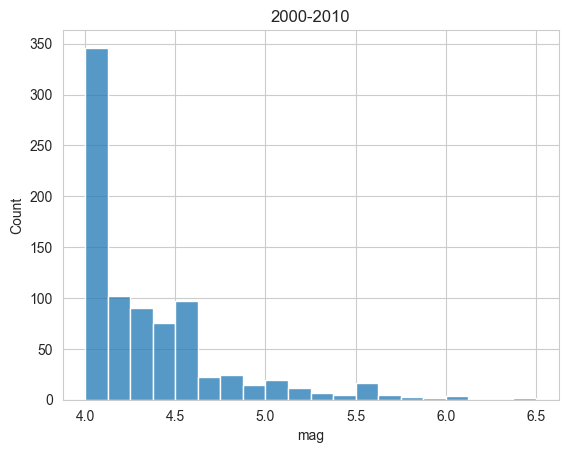

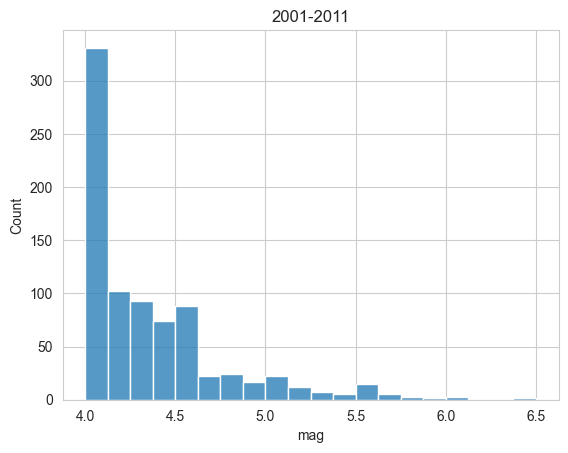

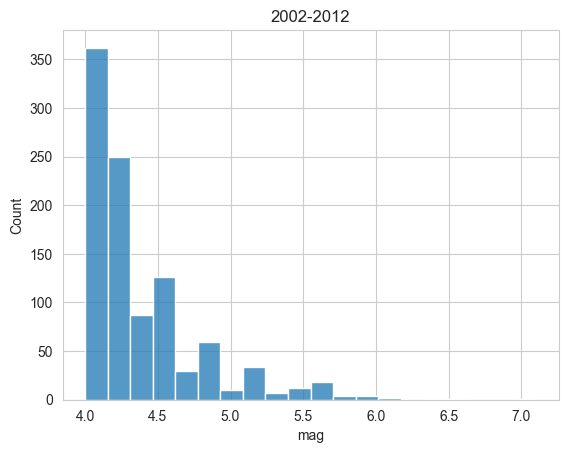

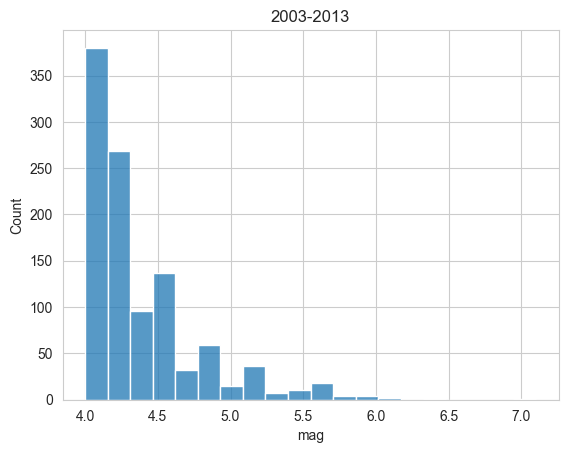

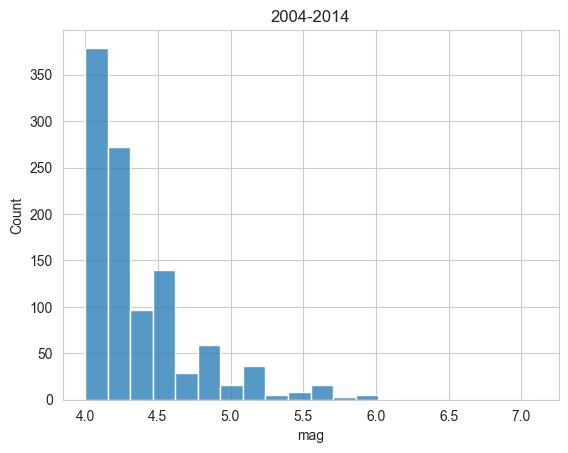

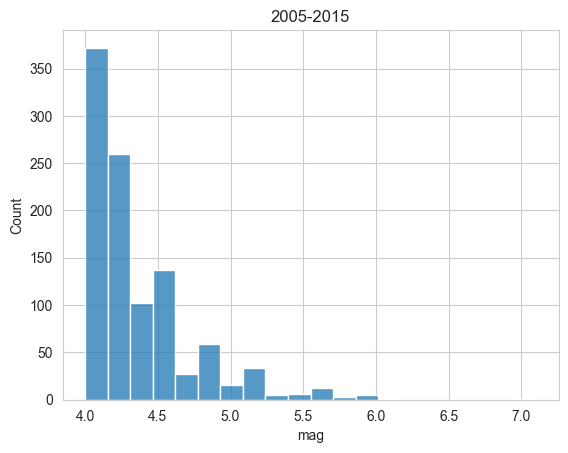

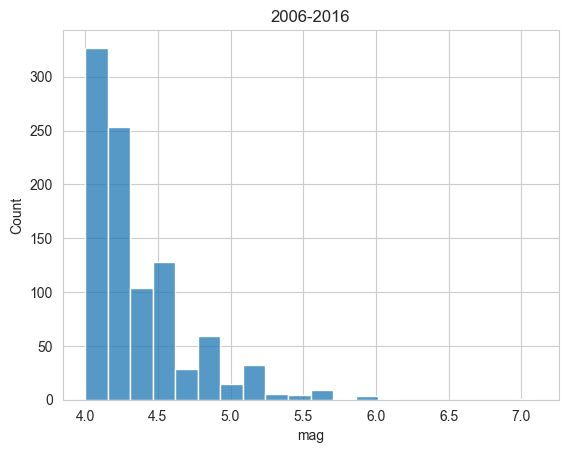

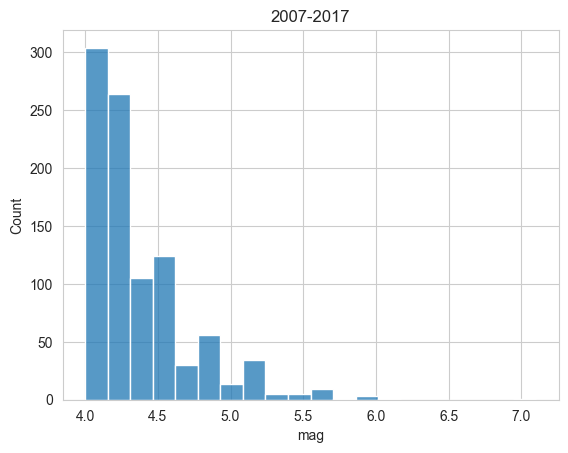

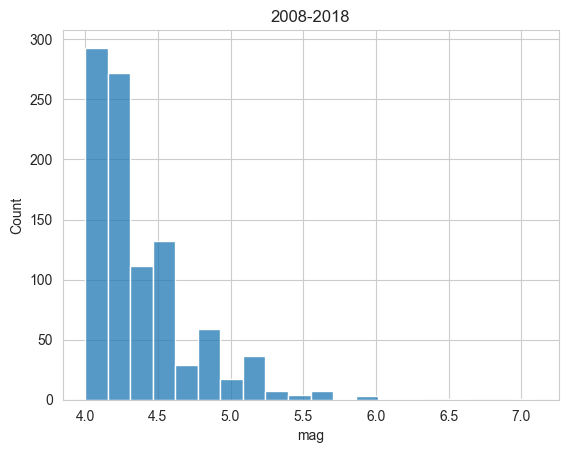

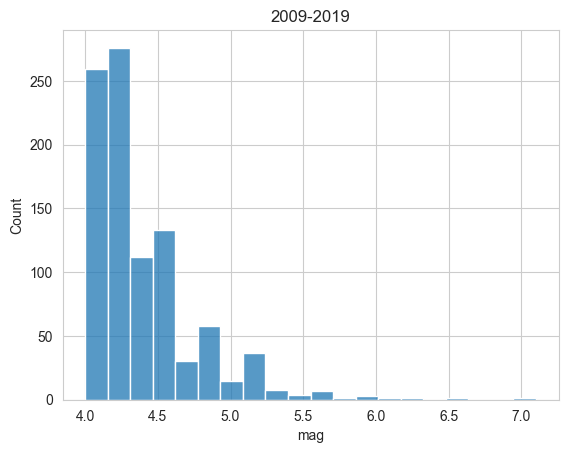

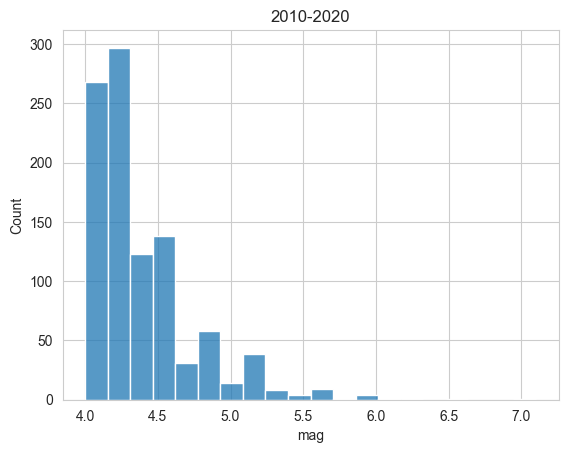

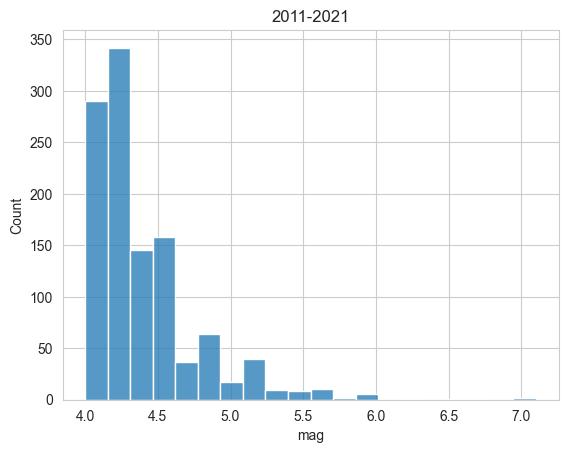

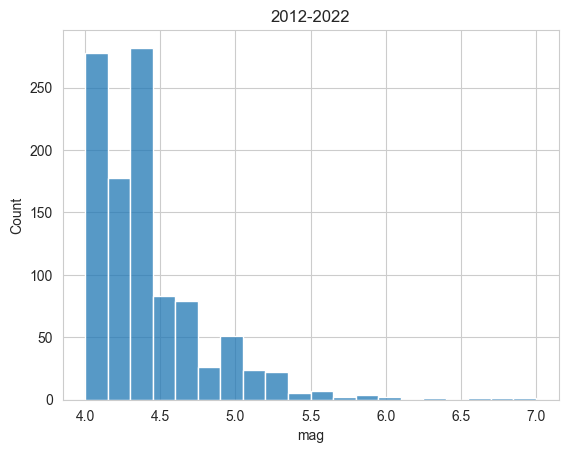

In [12]:
# Check the distributions of the magnitudes for each 10 years periods between 2000-2019
str_timed_data = data.copy()
str_timed_data["time"] = str_timed_data["time"].astype(str)
for i in range(13):
    period = str_timed_data[(str_timed_data["time"] >= f"{2000 + i}-01-01") & (str_timed_data["time"] < f"{2000 + i + 10}-01-01")]
    sns.histplot(data=period, x="mag", bins=20)
    plt.title(f"{2000 + i}-{2000 + i + 10}")
    plt.show()

Now, plot the data based on the longitude and latitude values.


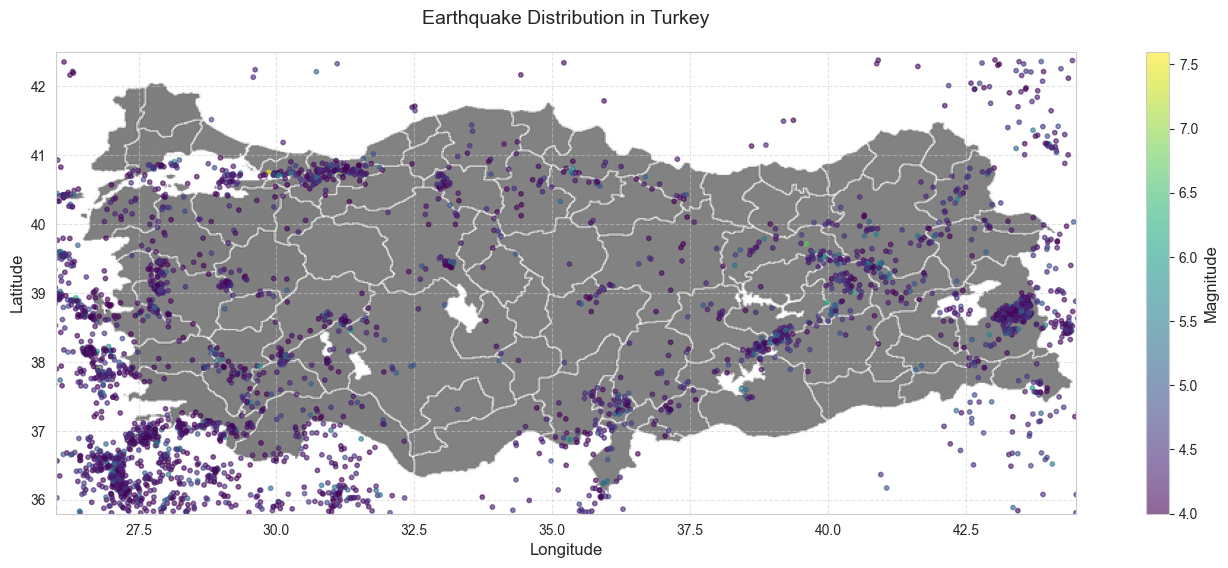

In [13]:
def plot_turkey_earthquakes(data, map_path, figsize=(18, 6)):
    """
    Plot earthquake data on a map of Turkey with proper scaling and formatting.
    
    Parameters:
    data: DataFrame with columns 'longitude', 'latitude', and 'mag'
    map_path: Path to the Turkey map image
    figsize: Tuple for figure size
    """
    plt.close('all')
    fig, ax = plt.subplots(figsize=figsize)
    
    # Read and display the map
    img = plt.imread(map_path)
    
    # Define the geographical boundaries of Turkey
    # Adjusted extent to stretch horizontally and compress vertically
    extent = [26, 44.5, 35.8, 42.5]  # Shifted slightly west and adjusted latitude range
    
    # Display the map with correct extent and aspect
    ax.imshow(img, extent=extent, aspect=1.25, cmap="gray")  # Increased aspect ratio for horizontal stretch
    
    # Create scatter plot of earthquakes
    scatter = ax.scatter(
        data['longitude'], 
        data['latitude'],
        c=data['mag'],
        cmap='viridis',
        alpha=0.6,
        s=10,
    )

    # Add colorbar
    cbar = plt.colorbar(scatter)
    cbar.set_label('Magnitude', fontsize=12)

    # Customize the plot
    ax.set_xlabel('Longitude', fontsize=12)
    ax.set_ylabel('Latitude', fontsize=12)
    ax.set_title('Earthquake Distribution in Turkey', fontsize=14, pad=20)

    # Set proper axis limits with slight adjustments
    ax.set_xlim(extent[0], extent[1])
    ax.set_ylim(extent[2], extent[3])

    # Add gridlines
    ax.grid(True, linestyle='--', alpha=0.5)

    return fig, ax

plt.close('all')  # Clear all figures
fig, ax = plot_turkey_earthquakes(data, "./resources/turkey_map.png")
plt.show()


We can clearly see the main earthquake zones in Turkey, which are the Marmara region, the Aegean region, and the Eastern Anatolia region.


In [14]:
# Check the missing value counts for columns
print(data.isnull().sum())


time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                1698
gap                1118
dmin               2227
rms                 893
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    2162
depthError         1739
magError           2101
magNst              608
status                0
locationSource        0
magSource             0
dtype: int64


Drop dmin and Errors as they have too many missing values.

Fill the nst (Number of stations), gap (Azimuthal Gap), magNst and rms columns with the median value.


In [15]:
data.drop(columns=["dmin", "horizontalError", "depthError", "magError"], inplace=True)

data["nst"] = data["nst"].fillna(data["nst"].median())
data["gap"] = data["gap"].fillna(data["gap"].median())
data["magNst"] = data["magNst"].fillna(data["magNst"].median())
data["rms"] = data["rms"].fillna(data["rms"].median())

print(data.isnull().sum())


time              0
latitude          0
longitude         0
depth             0
mag               0
magType           0
nst               0
gap               0
rms               0
net               0
id                0
updated           0
place             0
type              0
magNst            0
status            0
locationSource    0
magSource         0
dtype: int64


No missing values left, we can proceed with the dropping or feature engineering.


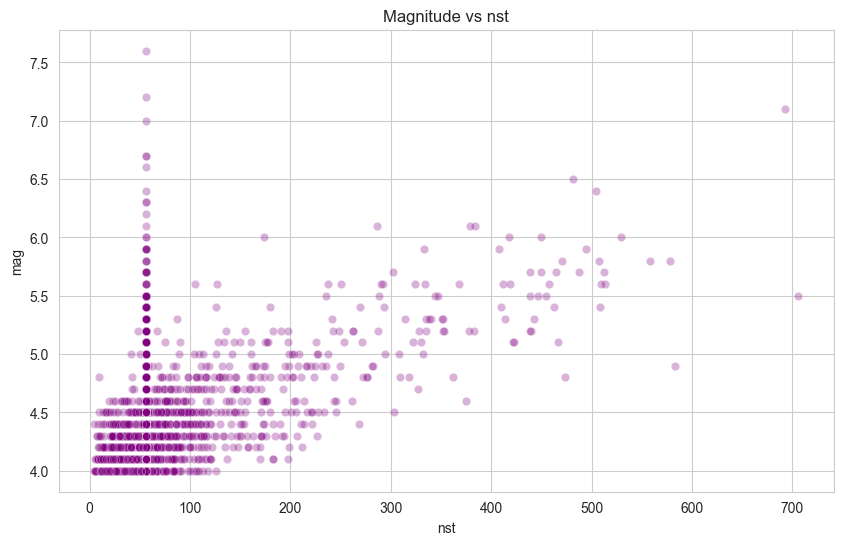

In [16]:
# Plot the magnitude vs nst, see if there are any outliers which are detected by a small number of stations
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="nst", y="mag", color="purple", alpha=0.3)
plt.title("Magnitude vs nst")
plt.show()


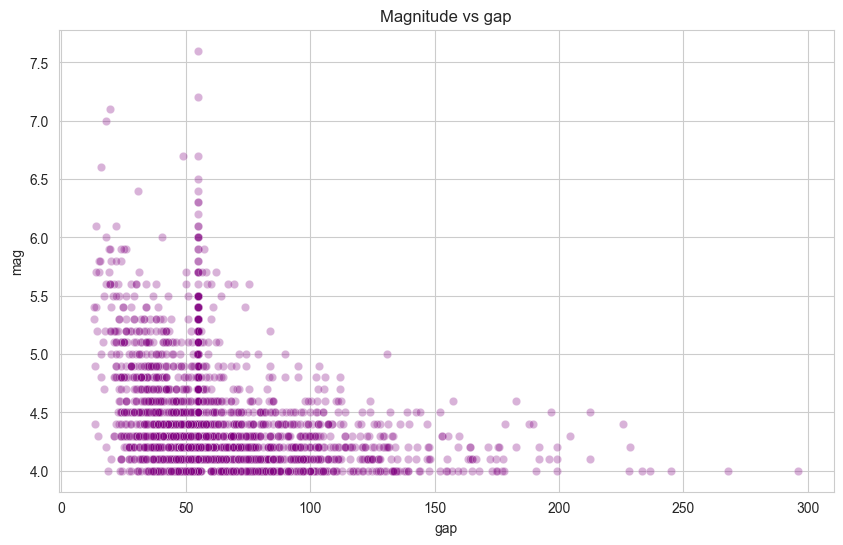

In [17]:
# Plot the magnitude vs gap, see if there are any outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="gap", y="mag", color="purple", alpha=0.3)
plt.title("Magnitude vs gap")
plt.show()


In [18]:
data.drop(data[data["gap"] > 200].index, inplace=True)
# Drop the rows with gap values greater than 200, as they tend to be unreliable, they are not significant either way


In [19]:
# We can drop the net column as it is not informative
data.drop(columns=["net"], inplace=True)


In [20]:
# We can drop the id, updated, type, place, magNst, status, locationSource, and magSource columns as they are not informative      
data.drop(columns=["id", "updated", "type", "place", "magNst", "status", "locationSource", "magSource"], inplace=True)


In [21]:
print(data.head())


         time  latitude  longitude  depth  mag magType   nst   gap  rms
21 1990-12-13    36.245     27.789   71.9  4.0      md  56.0  55.0  1.3
27 1990-12-16    41.361     43.715   33.0  5.5      mw  56.0  55.0  1.2
32 1990-12-19    38.595     28.044   10.0  4.4      mb  56.0  55.0  1.2
45 1990-12-23    42.115     44.356   33.0  4.1      mb  56.0  55.0  1.3
61 1990-12-29    37.932     28.038   10.0  4.1      ml  56.0  55.0  1.4


In [22]:
# Create another column, which is 1 or 0 based on if an earthquake greater than 4.8 magnitude happened close to the earthquake in the last 1 week
# We can define close as 0.4 degrees of latitude and longitude
from trials import find_recent_earthquakes

data = find_recent_earthquakes(data)

# counts
print(data["close_event"].value_counts())


close_event
0    2352
1     691
Name: count, dtype: int64


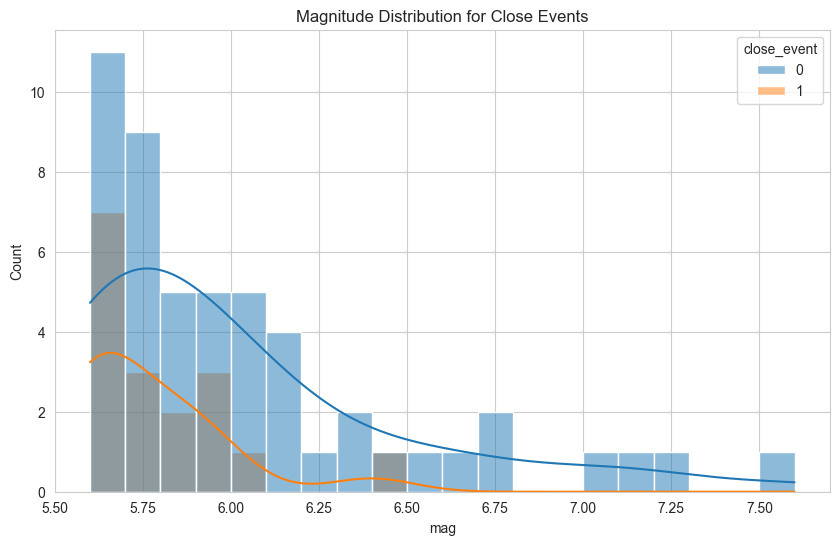

In [23]:
# Check the magnitude distribution for the close events
plt.figure(figsize=(10, 6))
sns.histplot(data=data[data["mag"] > 5.5], x="mag", hue="close_event", bins=20, kde=True)
plt.title("Magnitude Distribution for Close Events")
plt.show()


We can observe that this close_event property can help predicting the relatively mid level earthquakes. The larger earthquakes are not generally affected by the close events.

In [24]:
# Let's add another feature, the largest earthquake within longitude and latitude proximity of 0.5 degrees in the last 20 years
from trials import find_largest_nearby_earthquake

# Add the new feature to the dataframe
data['largest_nearby_earthquake'] = data.apply(
    lambda row: find_largest_nearby_earthquake(data, row), 
    axis=1
)

print(data["largest_nearby_earthquake"].value_counts())


largest_nearby_earthquake
5.5    240
5.6    217
5.2    206
4.8    152
0.0    139
5.1    129
7.1    118
4.7    114
6.0    114
5.4    113
5.7    111
4.5    108
5.9    107
4.6    104
4.9    103
6.2    102
6.1    101
4.1    100
4.4     89
6.4     82
4.2     70
5.8     63
5.3     59
6.6     49
6.7     47
4.3     47
6.3     36
5.0     28
4.0     26
6.5     20
7.2     18
7.0     18
7.6     13
Name: count, dtype: int64


In [25]:
# Let's see if there is a correlation between the magnitude and the largest nearby earthquake, with chi2
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data["mag"] > 4.0, data["largest_nearby_earthquake"] > 4.5)

# Perform the chi2 test
chi2, p, _, _ = chi2_contingency(contingency_table)

print("Chi2 value: ", chi2)
print("P-value: ", p)


Chi2 value:  2.8516963173726753
P-value:  0.09127758127239276


We see that the earthquake with a magnitude greater than 4.0 is correlated with the largest nearby earthquake with a magnitude greater than 4.5.
